<a href="https://colab.research.google.com/github/physalily/colab/blob/master/oneNodeNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 深層学習による1次関数の近似
---
　深層学習を利用して1次関数($y=Ax+B$)を学習させます。

注意：ちなみに層が1つしかないものを深層学習とは言いませんが、学習手法そのものは相違ありませんので、今回は目を閉じておいてください。

In [0]:
# 普通にKerasを使っていきます。
# また、可視化のためのモジュールもいくつか入れておきます。
import keras
import random
import numpy as np
import matplotlib.pyplot as plt
# colaboratory上で動作させた場合は警告が出るかもしれません。。。

---
### モデルの構築
---
モデルを構築していきます。
> model = keras.layers.Dense(units=1, input_shape=[1])

この一行でネットワークモデルを定義します。kerasモジュールのlayers内、Dense(全結合層)を使っています。
Dense内のunitsはユニットの数、input_shapeは入力の形を表します。

今回の場合だと、入力は$x$の一つだけです。そのため、input_shapeは[1]となっています。

もし、これが画像などの2次元や3次元で与えられるものであれば($28,28,3$)のような形になります。

> model.compile(optimizer="sgd", loss='mean_squared_error')

の部分で最適化関数と損失関数を定義します。

最適化関数は誤差逆伝播法を用いて学習を行う際に利用される関数です。

損失関数は、入力に対しての出力の誤差を定義する関数です。今回の場合、mean square errorつまり平均二乗誤差を用いています。

---

ちなみにですが、実は今回の例だと深層学習とは言いません。層が1層では深層とはいえませんよね。


In [0]:
# define the model.
# モデルを作っていきます。
# ネットワークとしては
#       o         ←バイアス    
#          > o   ←出力
#       o         ←入力
# のような形になります。
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
# optimizer: 最適化関数
# loss:         損失関数

---
### 教師データの準備
---
教師データを用意します。

入力と出力が対応したデータをそれぞれ６つ用意します。この両者の関係は$y=2x-1$となる一次多項式です。

In [0]:
# create train data.
# 学習データを準備します。 両者にはy=2x-1の関係があります。
# input data   : xs 
# output data : ys
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

---
### ネットワークモデルの学習
---

さて、皆さんお待ちかねの”学習”をしましょう。
> mode.fit(xs, ys, epochs=500)

この一行で定義したネットワークモデルは学習を始めます。

xsが入力、ysが出力

そしてその組み合わせで"学習"を500回させるというのがこの一行に書かれています。

---
本来であれば誤差逆伝播法をプログラムで書くのは非常にめんどくさいのですが、Kerasを利用することで驚くほど簡単に学習させることができます。


In [0]:
# fitting the model.
# Epoch : number of refrain.
# verbose: status log.
history = model.fit(xs, ys, epochs=500)




Epoch 1/500





6/6 [==============================] - 1s 119ms/step - loss: 25.3080
Epoch 2/500
6/6 [==============================] - 0s 830us/step - loss: 20.2029
Epoch 3/500
6/6 [==============================] - 0s 648us/step - loss: 16.1804
Epoch 4/500
6/6 [==============================] - 0s 437us/step - loss: 13.0099
Epoch 5/500
6/6 [==============================] - 0s 350us/step - loss: 10.5097
Epoch 6/500
6/6 [==============================] - 0s 426us/step - loss: 8.5370
Epoch 7/500
6/6 [==============================] - 0s 700us/step - loss: 6.9795
Epoch 8/500
6/6 [==============================] - 0s 486us/step - loss: 5.7487
Epoch 9/500
6/6 [==============================] - 0s 250us/step - loss: 4.7751
Epoch 10/500
6/6 [==============================] - 0s 303us/step - loss: 4.0040
Epoch 11/500
6/6 [==============================] - 0s 191us/step - loss: 3.3922
Epoch 12/500
6/6 [==============================] - 0s 258us/step - loss: 2.9059
Epoch 13/500
6/6 [======

---
### モデルの検証
---

学習させたモデルが本当に学習できているのか確認してみましょう。

学習したモデルに対して$x=10$を入力してみましょう。

In [0]:
# 学習したモデルに対して[10]を入れてみます。
# 解析解である2x-1であれば19が出力されますが、残念ながら19ぴったりには出ないと思います。
# 
print('input: x [10], y = ' ,model.predict([10.0]))

input: x [10], y =  [[18.979761]]


---
### 検証結果の可視化
---

先程は学習させたモデルに10を入力してみました。しかし、それだけではよくわかりませんよね…

乱数で入力データと同じように$-1.0から4.0$までの数を複数準備し、どのような出力結果になるのかグラフにしてみましょう。また、最小二乗法を利用して$A,B$の値がそれぞれ幾つになったのか確認しましょう。

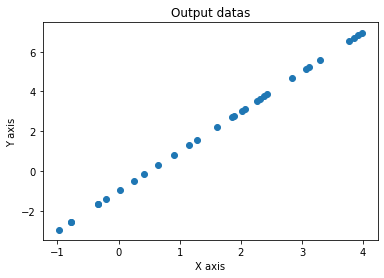

x: [1.99706675]   y: [-0.99090578]


In [0]:
# グラフにして可視化します。
# 教師データ(xs, ys)と同じように-1.0~4.0までの間で乱数を生成し、どのような出力を得られるのか確認します。
random.seed(10, version=2)
test_data = np.asarray([random.uniform(-1.0, 4.0) for i in range(30)])
# 便利なことにnumpy配列そのまま入れるとnumpy配列で出てきます。
test_prediction = model.predict(test_data)

# matplotlib.pyplot モジュールで可視化します。　有名なので使い方はググれば出ます。
plt.scatter(test_data, test_prediction)
plt.title("Output datas")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()
# 最小二乗法でaとbがそれぞれどんな値になっているのか見てみましょう。
# これについてもnumpy.polyfitで値が出てきます。
result = np.polyfit(test_data, test_prediction, 1)
print("x:",result[0],"  y:",result[1])

---
### 教師データの可視化
---

　先程学習させた結果を確認しました。ここで、どのような教師データを使って学習させたのか確認してみましょう。

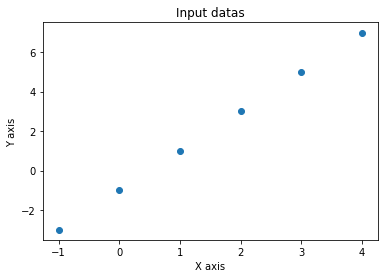

In [0]:
# ここで教師データを可視化してみます。
# 学習させたモデルは中間値（学習させていない部分）を測定できていると思います。
plt.scatter(xs, ys)
plt.title("Input datas")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

---
### 学習過程の可視化
---

結果の可視化は比較的簡単にできたと思います。実際どのように学習が進んでゆくのか可視化してみます。

> model.fit()

はモデルを再定義しない限り学習が保存されます。その性質を利用してEpochを1づつ回したのですが、正直かなり酷いコードだと思うので、改良が必要だと思います。

---

動作させる際には、一度モデルをコンパイルし直してください。一度学習させた状態から学習させても面白くない動画になります。

Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1


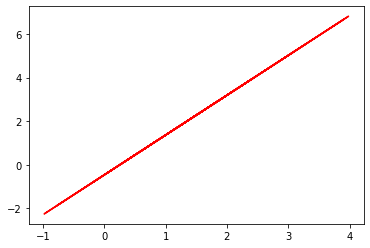

In [0]:
# test code for animation.
# this code visualise learning log in animation.
# 
# ... but this is fuok code. So its need refactaring.

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

from matplotlib import  animation, rc
random.seed(10, version=2)
test_data = np.asarray([random.uniform(-1.0, 4.0) for i in range(30)])

Epochs = 100

fig = plt.figure()
ims = []

for i in range(Epochs):
  model.fit(xs, ys, epochs=1, verbose=3)
  test_prediction = model.predict(test_data)
  test_prediction_image = plt.plot(test_data,test_prediction,color='red')
  ims.append(test_prediction_image)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
rc('animation', html='jshtml')
ani

---
## 紙とペンによる学習。
---

上で「ニューラルネットワークによる学習とは重みの更新である。」と書いたと思います。では具体的にどのようにして重みを更新するのか手計算で追っていきましょう。


---
#### ネットワークの数式化
---

今回使ったニューラルネットワークを数式で表します。

$$
x=入力　　y=出力　b=1=バイアス　w_1, w_2=重み として
$$
$$
      \left[\begin{array}{c}
            w_1 w_2
      \end{array}\right]
      \left[\begin{array}{c}
            x \\  b \\
      \end{array}\right] = y
$$

入力、出力の他にバイアスが存在しています。これは数式に入力によって値が変化しない切片があるためです。この切片を近似させるためにバイアスに掛かる重みを調整させます。つまり、バイアスは常に入力がなく、１などのわかりやすい数値になることが多いです。

この式を展開します。

$$
      w_1x + w_2b = y
$$

この形は近似させる$y = Ax + B$に非常によく似ています。つまり、この学習では、$w_1=A$, $w_2=B$となることが期待されています。

$y = 2x -1$を学習により近似させるので、データもそれに応じたデータを用意します。

入力データ：$\boldsymbol{x_{in}} = \left[\begin{array}{c}-1&0&1&2&3&4\end{array}\right]$
出力データ：$\boldsymbol{y} = \left[\begin{array}-3&-1&1&3&5&7\end{array}\right]$
として与えられているので先程の式へ代入します。なお、バイアスは１になります。ここでバイアスを含める$x$を定義しておきます。
$$
    \boldsymbol{x}=
    \left[\begin{array}{c}
      -1&0&1&2&3&4\\
      1&1&1&1&1&1\\
    \end{array}\right]
$$
これを用いて式を定義すると以下のようになります。
$$
    \left[\begin{array}{c}
      w_1&w_2
    \end{array}\right]
    \left[\begin{array}{c}
      -1&0&1&2&3&4\\
      1&1&1&1&1&1\\
    \end{array}\right] =
    \left[\begin{array}{c}
      -3&-1&1&3&5&7
    \end{array}\right]
$$

この対になる入出力データを教師データと呼びます。これは学習させる際の手本となるためです。
これを$\boldsymbol{y}=$の誤差を含んだ形で書き直せば、

$$
    \left[\begin{array}{c}
      -3&-1&1&3&5&7
    \end{array}\right] =
    \left[\begin{array}{c}
      w_1&w_2
    \end{array}\right]
    \left[\begin{array}{cc}
      -1&0&1&2&3&4\\1&1&1&1&1&1
    \end{array}\right] +
    \left[\begin{array}{c}
      e_1&e_2&e_3&e_4&e_5&e_6
    \end{array}\right]
$$

と書くことができます。

---
#### 誤差の定量化
---

重みの初期値はランダムに設定されるので、そこから計算した結果がどれだけ本来の値とズレているのか定量化します。
計算のため、重みの初期値を$[w_1,w_2]=[1,1]$として計算を行っていきます。
実際には重みの初期値はランダムで設定されることが多いです。（もちろん再現性のためのシード設定はされます。）

$$
    \left[\begin{array}{c}
      w_1&w_2
    \end{array}\right] 
    \left[\begin{array}{c}
      -1&0&1&2&3&4\\
      1&1&1&1&1&1\\
    \end{array}\right] =
    \boldsymbol{w}\boldsymbol{x} =
    \boldsymbol{g}
$$
$$
    \boldsymbol{g}=
    \left[\begin{array}{c}
      0&1&2&3&4&5
    \end{array}\right]
$$

初期値の重みを利用して$y$を推測した結果を得ることができます。
この推測されたデータを$g$として進めていきます。

教師データ$y$と推測したデータ$g$との誤差を損失関数で定義します。
今回は損失関数をmean square error（平均二乗誤差）としています。
$$
    E=\sum_{n=1}^n{\frac{1}{n}(\boldsymbol{e})^2}
$$
$$
    =\sum_{n=1}^6{\frac{1}{6}(g_i-y_i)^2}
$$
計算していくと
$$
    E=\frac{1}{6}(-2)^2+\frac{1}{6}(-1)^2+\frac{1}{6}(0)^2+\frac{1}{6}(1)^2+\frac{1}{6}(2)^2+\frac{1}{6}(3)^2
$$
$$
    =\frac{4+1+0+1+4+9}{6} = \frac{19}{6}
$$

機械学習ではこの損失関数によって出力された誤差が少なくなるように学習（重みの更新）を行います。

---
#### 重みの更新
---

上の式を利用して、重みの更新を行います。重みの更新は下の式で表すことができます。初めて見る$\eta$は学習率と呼ばれるものです。この学習率が大きければより大きな量が更新されます。

またこの更新の式の定義を最適化関数として定義しています。この手法ではSDGつまり確率的勾配降下法を利用します。

$$
    \boldsymbol{w_{+1}} = \boldsymbol{w}-\eta\frac{\partial}{\partial \boldsymbol{w}}\boldsymbol{E}
$$

この損失関数を重みで微分します。それによって損失関数の勾配(grad)を求めます。これが重みの更新に利用されます。
誤差の勾配を求めることで、より誤差が小さくなる方向に値を修正させることができます。確率的勾配降下法の名前はこの勾配を求めてより誤差が小さくなる方向に値を更新することから勾配降下法という手法の一つとなっています。
$$
    \Delta{\boldsymbol{E}}=(\boldsymbol{g}-\boldsymbol{y})\boldsymbol{x}^T
$$
ここで、$g$は$wx$で求めることができ、$x^T$は$x$の転置行列で以下のようになっています。また、$x$はバイアス項も含んでいることに注意してください。
$$
    \boldsymbol{g} = \boldsymbol{w}\boldsymbol{x}
$$
$$
    \boldsymbol{x}^T=
    \left[\begin{array}{c}
      4&1\\3&1\\2&1\\1&1\\0&1\\-1&1\\
    \end{array}\right]
$$
そのため、$\Delta E$は以下のようにして求めることができます。
$$
    \Delta\boldsymbol{E}=(\boldsymbol{w}\boldsymbol{x}-\boldsymbol{y})\boldsymbol{x}^T
$$
この式に数値を代入して更新する値を求めます。ここで$\Delta E$の前に学習率$\eta$あることに注意してください。
$$
    =\left[\begin{array}{c}
        -2&-1&0&1&2&3
      \end{array}\right]
      \left[\begin{array}{c c}
        4&1\\3&1\\2&1\\1&1\\0&1\\-1&1\\
      \end{array}\right]
$$
$$
    =\left[\begin{array}{c}
      (-8)+(-3)+0+1+0-3&(-2)+(-1)+0+1+2+3
    \end{array}\right]
$$
$$
    =\left[\begin{array}{c}-13&3\end{array}\right]
$$
重みの更新量を求めることができました。この値を使って新しい重みを定義します。式から現在の重みからこの更新量を引いたものが新たな重みになります。学習率$\eta=0.01$とします。
$$
    \boldsymbol{w}_{+1} \leftarrow \boldsymbol{w}-\eta\Delta \boldsymbol{E}
$$

$$
    \boldsymbol{w}-\eta\Delta\boldsymbol{E}=
    (1, 1) - 0.01(-13, 3)=(1.13, 0.97)
$$
$\boldsymbol{w}$が与えられた教師データによって$[2, -1]$へ近づきました。
あとはこれを繰り返していけば値を近似できることがわかるでしょうか？

層が複数ある場合でもこの方法から、更新した重みから次の層の更新する重みを計算することができます。このような重みの更新方法を誤差逆伝播法といいます。

今回手計算を行った重みの更新ですが、この更新１回が1Epochに相当します。つまり上で動かしたプログラム上では、500回この動作を機械が行ったということです。

また、今回は入力データ６つすべてを利用していますが、画像などはバッチというグループに分けて学習を進める手法です。バッチ数はこの入力データを分割した数に相当します。